In [43]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt

In [44]:
currency = 'USD'
metric = 'Close'

start = dt.datetime(2018,1,1)
end = dt.datetime.now()

crypto =['BTC', 'ETH', 'LTC', 'ADA', 'ADAX', 'KICK']
colnames = []

first = True

for ticker in crypto:
    data = web.DataReader(f'{ticker}-{currency}', 'yahoo', start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames
        


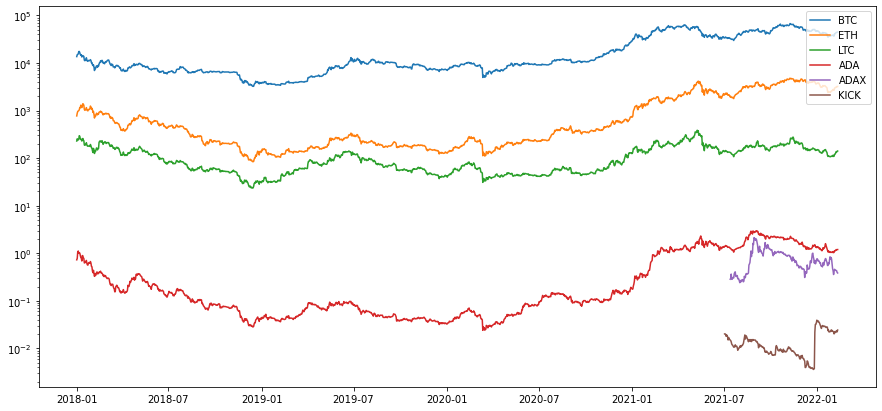

In [45]:
plt.figure(figsize=(15,7))
plt.yscale('log')

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)
    
plt.legend(loc='upper right')

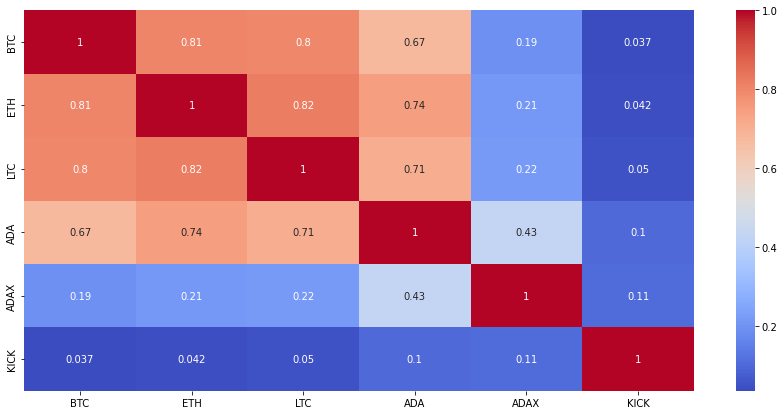

In [46]:
plt.figure(figsize=(15,7))
combined = combined.pct_change().corr(method='pearson')

sns.heatmap(combined, annot=True, cmap='coolwarm')
plt.show()

In [47]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>